In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [3]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [4]:
X


array([[-4.22379851,  3.55714513],
       [-0.74295311,  7.58003686],
       [ 3.47866289, -0.5467679 ],
       ...,
       [-2.17819765,  6.75796966],
       [ 4.25588696, -1.74420113],
       [-0.89683704,  5.77089224]], shape=(1000, 2))

In [5]:
y

array([2, 0, 1, 2, 0, 2, 0, 2, 2, 2, 1, 0, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2,
       0, 1, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 2, 2, 0, 2, 1, 0, 1, 1, 2, 1,
       0, 1, 0, 0, 2, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 2, 2, 0, 0, 1, 1, 2,
       2, 0, 2, 2, 2, 0, 1, 1, 2, 0, 1, 2, 2, 0, 1, 2, 2, 2, 1, 0, 1, 2,
       1, 0, 2, 2, 0, 2, 0, 1, 2, 0, 2, 2, 2, 0, 2, 1, 0, 2, 2, 2, 1, 1,
       1, 0, 0, 0, 2, 0, 0, 1, 2, 1, 1, 0, 1, 2, 1, 2, 0, 1, 0, 0, 2, 1,
       0, 2, 0, 1, 1, 2, 0, 0, 0, 0, 1, 1, 0, 1, 0, 2, 1, 2, 2, 0, 0, 1,
       0, 2, 2, 2, 1, 0, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 0, 2, 0, 1, 1, 1,
       0, 2, 2, 0, 0, 0, 1, 0, 2, 1, 1, 1, 1, 2, 1, 2, 0, 0, 0, 2, 1, 1,
       2, 0, 1, 0, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 0,
       0, 0, 0, 0, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 0, 1, 0, 0, 0,
       0, 0, 2, 0, 0, 2, 1, 2, 2, 0, 0, 1, 1, 2, 0, 0, 1, 1, 2, 2, 1, 0,
       0, 1, 0, 2, 1, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 1, 2, 1, 0,
       0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 0, 1, 1, 1,

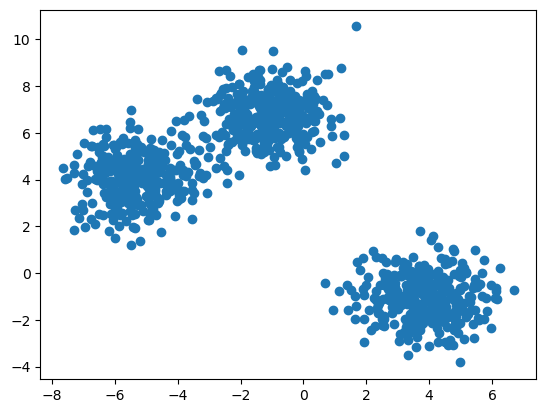

In [7]:
plt.scatter(X[:,0],X[:,1])

In [8]:
##standardization --feature scaling techniuqe
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [14]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [15]:
from sklearn.cluster import KMeans


In [17]:
##elbow method to select K value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\sakshi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\sakshi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\sakshi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\sakshi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

In [18]:
wcss


[1339.9999999999989,
 323.7000758464441,
 104.22273935994967,
 90.12464266830803,
 82.22977343491145,
 65.96474725631707,
 58.79672185755988,
 50.55657108252216,
 45.088524897319786,
 41.55419851036974]

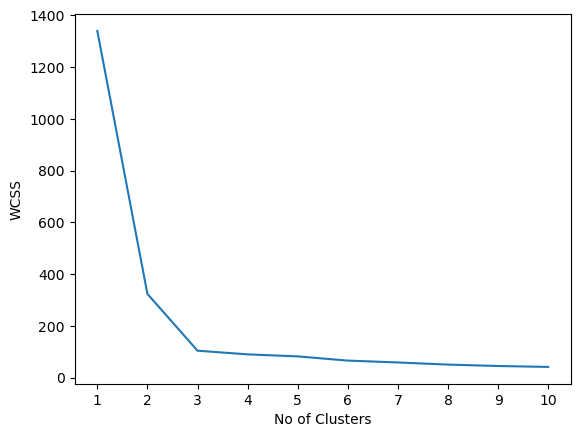

In [20]:
##plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("No of Clusters")
plt.ylabel("WCSS")
plt.show()

In [21]:
kmeans=KMeans(n_clusters=3,init="k-means++")
kmeans.fit_predict(X_train_scaled)

C:\Users\sakshi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


array([0, 1, 2, 0, 1, 1, 0, 2, 2, 1, 1, 1, 2, 1, 1, 0, 2, 0, 1, 2, 2, 2,
       0, 1, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 2, 2, 0,
       2, 1, 2, 0, 1, 0, 0, 0, 2, 1, 2, 0, 1, 2, 1, 1, 0, 0, 2, 0, 2, 2,
       1, 0, 2, 2, 2, 0, 2, 2, 1, 2, 0, 0, 2, 1, 1, 1, 2, 2, 0, 1, 0, 2,
       1, 1, 1, 2, 1, 2, 2, 0, 1, 2, 2, 2, 2, 0, 1, 0, 1, 1, 0, 2, 2, 1,
       2, 2, 2, 0, 1, 2, 0, 2, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 2, 1, 1, 2,
       1, 1, 1, 2, 1, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 1, 1, 2, 1,
       0, 0, 1, 1, 1, 0, 2, 2, 1, 1, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1,
       2, 0, 0, 2, 2, 1, 2, 1, 1, 2, 2, 2, 0, 2, 0, 1, 1, 0, 0, 0, 2, 2,
       1, 1, 0, 1, 2, 0, 0, 1, 0, 2, 1, 2, 0, 1, 1, 0, 0, 2, 2, 0, 2, 2,
       2, 2, 1, 2, 1, 0, 1, 0, 2, 0, 1, 2, 2, 1, 2, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 2, 0, 0, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0, 1, 0, 0, 2, 0, 0, 2,
       2, 2, 1, 2, 0, 1, 1, 0, 0, 1, 0, 2, 0, 2, 2, 1, 2, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2,

In [22]:
y_pred=kmeans.predict(X_test_scaled)

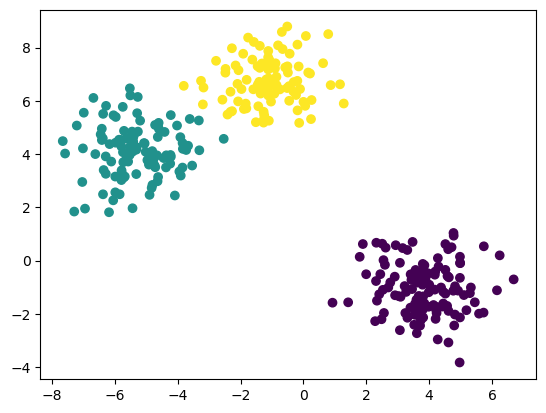

In [23]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [ ]:
##validating the k value
##kneelocator
##silhoutee housing


In [24]:
!pip install kneed

In [25]:
from kneed import KneeLocator

In [26]:
kl=KneeLocator(range(1,11),wcss,curve='convex',direction="decreasing")

In [27]:
kl.elbow

np.int64(3)

In [29]:
##silhoutte score
silhouette_coefficients=[]
from sklearn.metrics import silhouette_score
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

C:\Users\sakshi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\sakshi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\sakshi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\sakshi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

In [30]:
silhouette_coefficients

[0.7003812149664107,
 0.6961743375746763,
 0.5370104404739255,
 0.4195815785452235,
 0.41320072602223995,
 0.4852924094865827,
 0.3388044578124303,
 0.3359011442813965,
 0.33966112464766846]

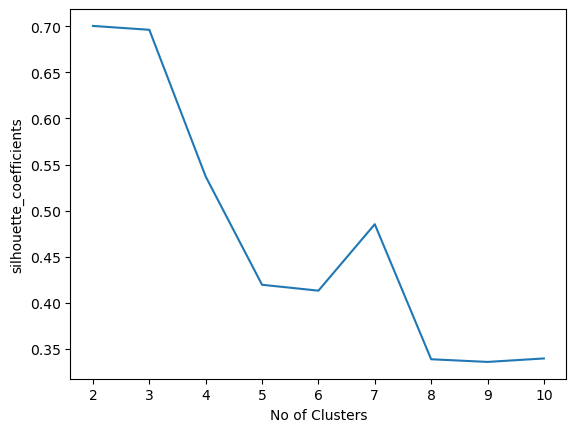

In [31]:
##plot elbow curve
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("No of Clusters")
plt.ylabel("silhouette_coefficients")
plt.show()